# **Logistic Regresion**

```scikit-learn``` webpage [here](https://scikit-learn.org/stable/index.html) \
```Iris``` dataset description [here](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris) \
```LogisticRegression``` documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html?highlight=logistic%20regression#sklearn.linear_model.LogisticRegression)

### In Synthetic data

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
import random

(500, 2) (500,)


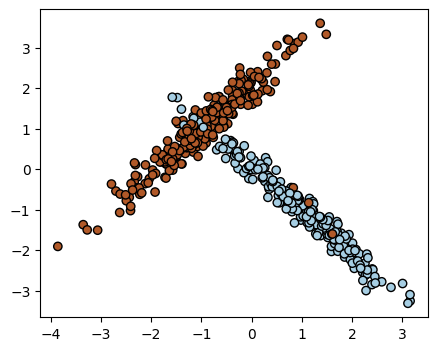

In [ ]:
X, y = make_classification(n_samples = 500 , n_features = 2 , n_redundant = 0, n_informative = 2, n_clusters_per_class = 1, n_classes = 2, random_state = 8)
print(X.shape,y.shape)
_, ax = plt.subplots(figsize=( 5 , 4 ))
ax.scatter( X[:,0] , X[:,1] , c = y , edgecolors='k' ,cmap = 'Paired')

In [ ]:
# Create an instance
logistic_regression = LogisticRegression()

# Train the model
logistic_regression.fit ( X , y ) #(# Samples, # Features)

LogisticRegression()

In [ ]:
print(logistic_regression.coef_,logistic_regression.intercept_)

[[-2.05708959  1.85247996]] [-1.61624314]


### **Decision boundaries**

In [ ]:
# Min-Max values for the grid of decision boundaries
offset=0.5

h_min, h_max = min(X[:,0])-offset ,max(X[:,0])+offset
V_min, V_max = min(X[:,1])-offset, max(X[:, 1])+offset
# Create grid
h_grid, V_grid = np.meshgrid( np.linspace(h_min,h_max, 100), np.linspace(V_min,V_max,100))
print(h_grid.shape,V_grid.shape)
print(h_grid.ravel().reshape(-1,1).shape,V_grid.ravel().shape)
print(np.concatenate([h_grid.ravel().reshape(-1,1),V_grid.ravel().reshape(-1,1)],axis=1).shape)
print(np.c_[h_grid.ravel(),V_grid.ravel()].shape)

# Estimate predictions over the grid
pred_grid = logistic_regression.predict(np.c_[h_grid.ravel(), V_grid.ravel()])
print (pred_grid.shape)
pred_grid=pred_grid.reshape(h_grid.shape)
print(pred_grid.shape)

(100, 100) (100, 100)
(10000, 1) (10000,)
(10000, 2)
(10000, 2)
(10000,)
(100, 100)


[]

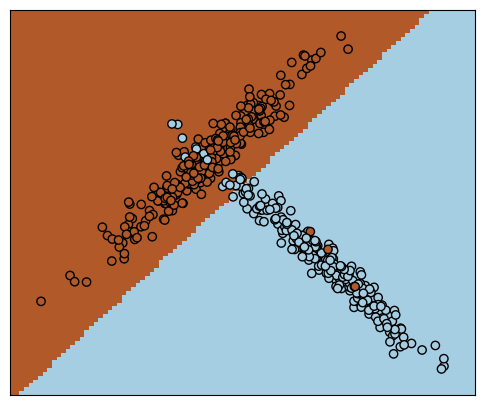

In [ ]:
# Reshape predictions
# predictions = _

# Draw grid
_, ax = plt.subplots (figsize=(6,5))
ax.pcolormesh( h_grid , V_grid , pred_grid , cmap = "Paired")

# Scatter real values
ax.scatter ( X[:,0] , X[:,1] , c = y , edgecolors = 'k', cmap = "Paired")

ax.set_xticks(())
ax.set_yticks(())

### In Real data

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris

In [ ]:
X,y=load_iris(return_X_y=True)
print(X.shape,y.shape)

(150, 4) (150,)


In [ ]:
iris = load_iris()
iris_x = iris.data[:, :2]
iris_y = iris.target

print(iris_x.shape, iris_y.shape)

(150, 2) (150,)


In [ ]:
# Create an instance
logistic_model = LogisticRegression(max_iter=1000, multi_class='ovr')

# Train the model
logistic_model.fit(iris_x, iris_y)  #(# Samples, # Features)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='ovr')

In [ ]:
# Min-Max values for the grid of decision boundaries
offset = 0.5
x_min, x_max = iris_x[:, 0].min() - offset, iris_x[:, 0].max() + offset
y_min, y_max = iris_x[:, 1].min() - offset, iris_x[:, 1].max() + offset

# Create grid
x_grid, y_grid = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))


# Estimate predictions over the grid
grid_points = np.c_[x_grid.ravel(), y_grid.ravel()]  # Convertir la cuadrícula a un formato adecuado
predictions = logistic_model.predict(grid_points)
print(predictions.shape)


(10000,)


[]

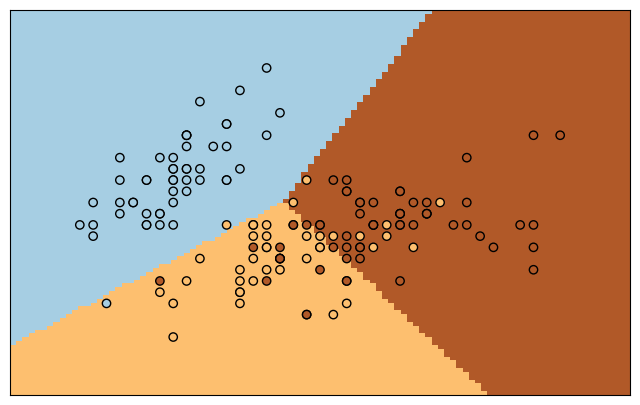

In [ ]:
# Reshape predictions
predictions = predictions.reshape(x_grid.shape)

# Draw grid
_, ax = plt.subplots(figsize=(8, 5))
ax.pcolormesh(x_grid, y_grid, predictions, cmap="Paired", shading='auto')

# Scatter real values
ax.scatter(iris_x[:, 0], iris_x[:, 1], c=iris_y, edgecolors='k', cmap="Paired")

ax.set_xticks([])
ax.set_yticks([])
